# Part 1: Exploratory Data Analysis
### Customer Satisfaction Data   Analysis  
#### Objective
The goal is to build a model that can predict if a customer was not satisfied by their flight immediately after they submit a survey. 

The customer service representatives are usually very busy so the department needs to prioritize who to reach out to first.

---

### Organization of the Notebook

Part 1: Load Packages

Part 2: User Defined Functions

Part 3: Read Data 

Part 4: Explore Data : 

4.1: Quick Check  : Dataframe Property

4.2: Detailed Check : 

4.2a: Investigate the interaction of all features with "Satisfaction" & Loyality

4.2b: Distribution Similarity using Jensen-Shannon Distance Measure, Relative Entropy (0 : No Difference)

Part 5: Explore Class Decision Boundary 

Part 6: Insight/Conclusion

## Part 1: Load Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from scipy.spatial.distance import jensenshannon

## Note : Install "openpyxl" to read ".xlsx" file using Pandas 

https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html

https://openpyxl.readthedocs.io/en/stable/

pip install openpyxl

## Part 2: User Defined Functions

In [2]:
def getFeatureInteraction(df, fName): 
    """
    Input : Dataframe, A single feature, fName 
    Output: Dataframe having interaction bettween fName vs  and SatisfactionType 
    """
    tmp = df.groupby(["CustomerType", "SatisfactionType"]).size().to_frame().reset_index().rename( columns= {0:"Count"} )

    df_ = df.groupby(["CustomerType", "SatisfactionType", fName]).size().to_frame().reset_index().rename( columns= {0:"Count"} )
    df_ = pd.merge(df_, tmp, 
                  left_on=['CustomerType','SatisfactionType'], 
                  right_on=['CustomerType','SatisfactionType'])
    df_['Fraction'] = df_.apply( lambda x : round(100* np.float64(x[3])/x[4], 2), axis=1)
    return df_

In [3]:
def plotFeatureInteraction(x, y, h, xtick_label, ytick_label, fName):
    fig, ax = plt.subplots(figsize=(18,6))

    width = 0.35  # the width of the bars
    x = x         # the xlabel locations
    y = y         # the ylabel locations

    bars1 = ax.bar(x - width/2, h[0], width, color='red', label='Loyal Customer - Neutral or Dissatisfied')
    bars2 = ax.bar(x + width/2, h[1], width, color='cornflowerblue', label='Loyal Customer - Satisfied')

    # Setting x-axis
    ax.set_xticks(x)
    ax.set_xticklabels(labels=xtick_label, fontsize=12)
    ax.set_xlabel(fName, fontsize=15)

    # Setting y-axis
    ax.set_yticks(y)
    ax.set_yticklabels(labels=ytick_label, fontsize=12)
    ax.set_ylabel("Percent of Customers", fontsize=15)

    # Setting legend
    ax.legend(fontsize=15, loc=2)

    # Setting bar text
    for k in x:
        height = bars1[k].get_height()
        plt.text(x[k]-0.3, height+0.5, str(y1[k])+" %", fontsize=11)
        height = bars2[k].get_height()
        plt.text(x[k]+0.05, height+0.5, str(y2[k])+" %", fontsize=11) 

    plt.show()

In [4]:
def getJSDistance(df, fName):
 
    p = df.groupby(by=['SatisfactionType']).size().to_list()
    p = [k/df.shape[0] for k in p]

    q = df.groupby(fName).size().to_list()
    q = [k/df.shape[0] for k in q]
    
    len_diff = len(q)-len(p)
    if len_diff > 0:
        p = p + [0.0]*(len_diff)
        js_distance = jensenshannon(p, q, base=2)
    else:
        js_distance = jensenshannon(p, q, base=2)
    
    return js_distance

-----------------

## Part 3: Read Data

In [5]:
df = pd.read_excel("data_customerSatisfaction.xlsx", engine="openpyxl")
print("Shape of the Dataframe :", df.shape)

Shape of the Dataframe : (129880, 24)


## Part 4: Explore Data

### 3.1 : Quick Exploration 

In [6]:
print( df.columns.to_list() )

['id', 'SatisfactionType', 'Gender', 'CustomerType', 'Age', 'Type of Travel', 'Class', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


#### Check : The types of customer loyality 

In [7]:
df_ct = df.groupby(["CustomerType"]).size().to_frame().reset_index().rename( columns= {0:"Count"} )
df_ct['Total Customer'] = df.shape[0]
df_ct['Fraction'] = df_ct.apply( lambda x : round(100* np.float64(x[1])/x[2], 2), axis=1)
print(df_ct)

        CustomerType   Count  Total Customer  Fraction
0     Loyal Customer  106100          129880     81.69
1  disloyal Customer   23780          129880     18.31


#### Check : The split of statisfied & un-satisfied customers

In [8]:
df_satis = df.groupby(["SatisfactionType"]).size().to_frame().reset_index().rename( columns= {0:"Count"} )
df_satis['Total Customer'] = df.shape[0]
df_satis['Fraction'] = df_satis.apply( lambda x : round(100* np.float64(x[1])/x[2], 2), axis=1)
print(df_satis)

          SatisfactionType  Count  Total Customer  Fraction
0  neutral or dissatisfied  73452          129880     56.55
1                satisfied  56428          129880     43.45


#### Check : Who are the Loyal but Dissatisfied customer?

The company has ~82% loyal customer. Therefore, one should identify the possible reasons behind the 
unhappiness of Once the reasons of dissatisfaction are identified then the business can take the 
necessary steps to address those.

In [9]:
df_custtype = df.groupby(["CustomerType", "SatisfactionType"]).size().to_frame().reset_index().rename( columns= {0:"Count"} )
df_custtype['Total Customer'] = df.shape[0]
df_custtype['Fraction'] = df_custtype.apply( lambda x : round(100* np.float64(x[2])/x[3], 2), axis=1)
print(df_custtype)

        CustomerType         SatisfactionType  Count  Total Customer  Fraction
0     Loyal Customer  neutral or dissatisfied  55372          129880     42.63
1     Loyal Customer                satisfied  50728          129880     39.06
2  disloyal Customer  neutral or dissatisfied  18080          129880     13.92
3  disloyal Customer                satisfied   5700          129880      4.39


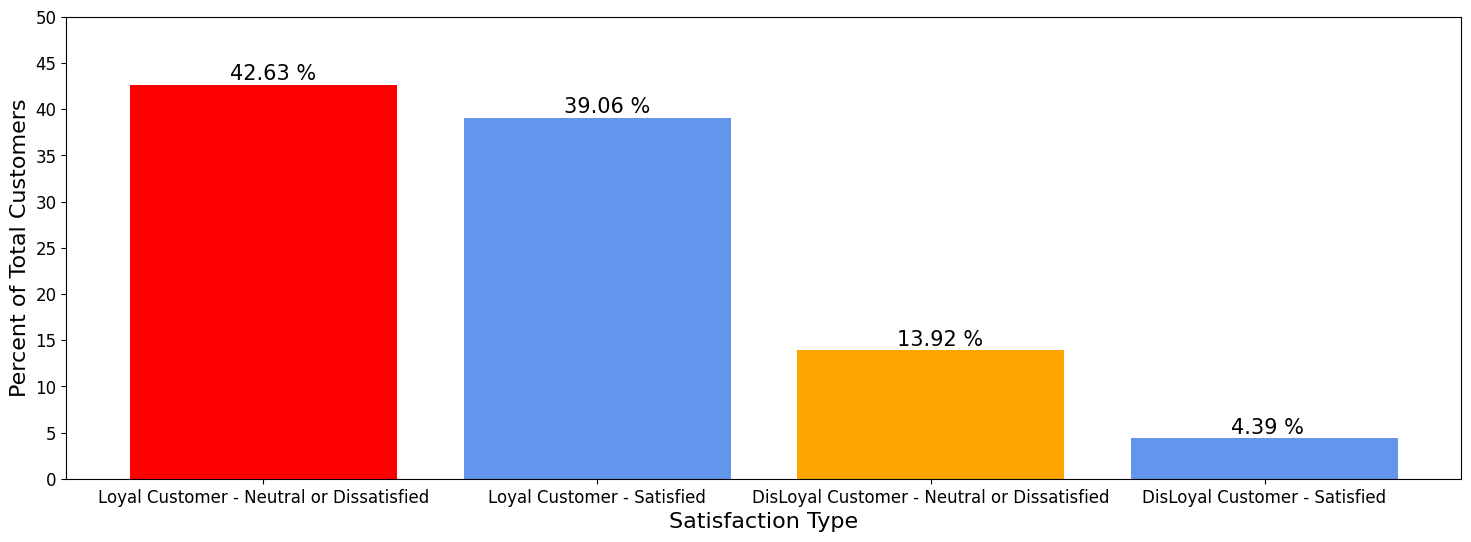

In [10]:
fig, ax = plt.subplots(figsize=(18,6))

x = np.arange(4)
y = np.arange(0,51,5)

xlabel = ["Loyal Customer - Neutral or Dissatisfied", "Loyal Customer - Satisfied", 
          "DisLoyal Customer - Neutral or Dissatisfied", "DisLoyal Customer - Satisfied"]

bars = ax.bar(x, df_custtype['Fraction'], color=['red', 'cornflowerblue', 'orange','cornflowerblue'])

# Setting x-axis
ax.set_xticks(x)
ax.set_xticklabels(labels=xlabel, fontsize=12)
ax.set_xlabel("Satisfaction Type", fontsize=16)

# Setting y-axis
ax.set_yticks(y)
ax.set_yticklabels(labels=y, fontsize=12)
ax.set_ylabel("Percent of Total Customers", fontsize=16)

# Setting bar text 
for k in x:
    height = bars[k].get_height()
    plt.text(x[k]-0.1, height+0.5, str(df_custtype['Fraction'].tolist()[k])+" %", fontsize=15)

plt.show()

-------

### 3.2 : Detailed Exploration 

#### Check 01: Satisfaction by Gender

In [11]:
fName = "Gender"
df_gender = getFeatureInteraction(df, fName)
#print(df_gender.drop(['Count_x','Count_y'], axis=1))

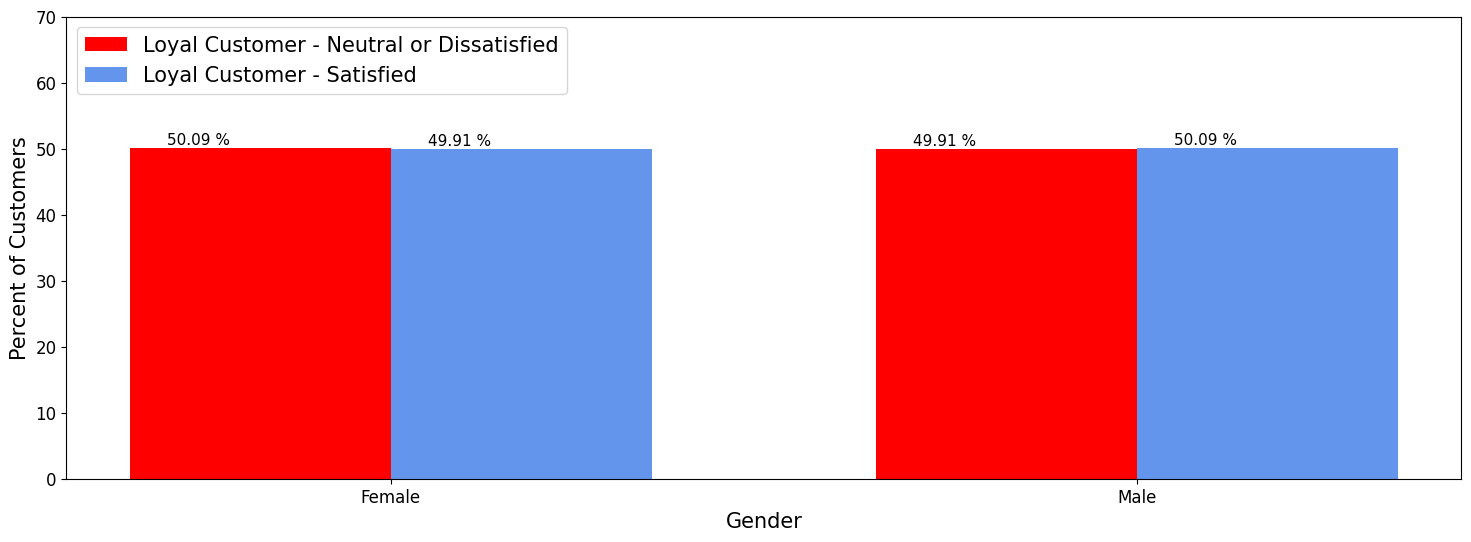

In [12]:
x = np.arange(2)        # the xlabel locations
y = np.arange(0,76,10)  # the ylabel locations
y1 = df_gender[ (df_gender["CustomerType"]=="Loyal Customer") & (df_gender["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_gender[ (df_gender["CustomerType"]=="Loyal Customer") & (df_gender["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["Female","Male"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Gender")

In [13]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Gender : 0.0495


--------

#### Check 02: Distribution of Age

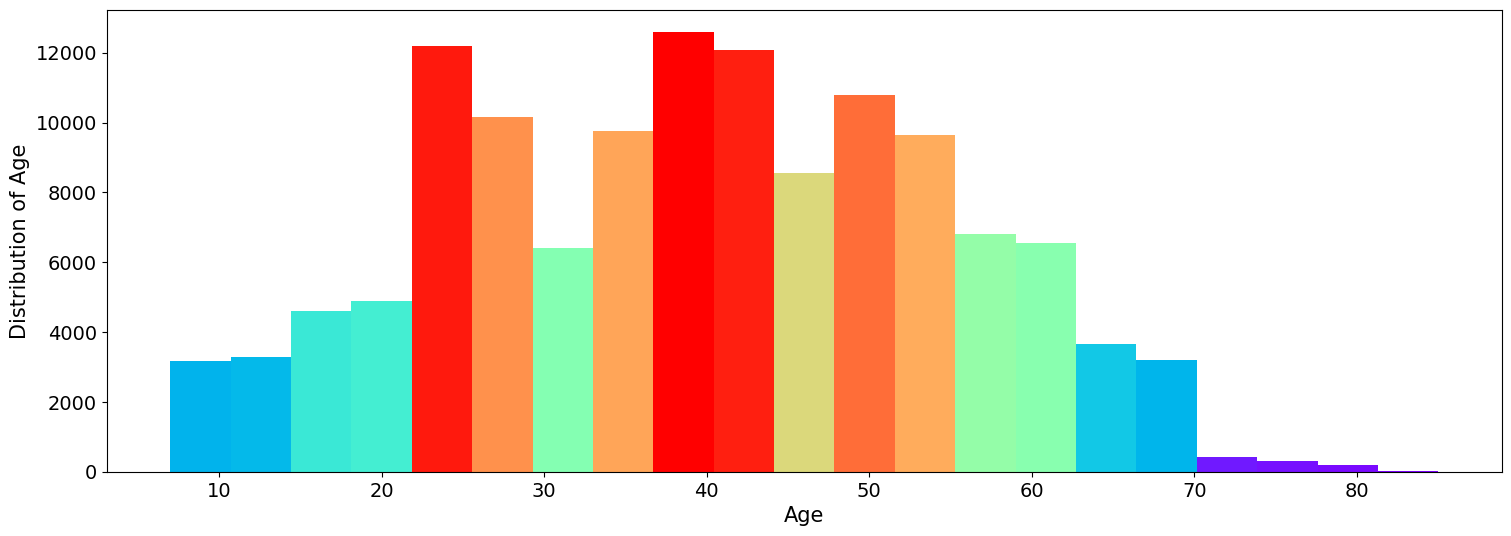

In [14]:
from matplotlib import colors

fig = plt.figure( figsize=(18,6) )

n, bins, patches = plt.hist(df['Age'], bins=21)

# Color code by bin heights
fracs = n / n.max()

# Normalize the data to 0-1 for the full range of the colormap
norm = colors.Normalize( fracs.min(), fracs.max() )

# Loop through the 'norm' object and set the color of each accordingly
for _frac, _patch in zip(fracs, patches):
    color = plt.cm.rainbow( norm(_frac) )
    _patch.set_facecolor(color)
    
plt.xticks(fontsize=14)
plt.xlabel("Age", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Distribution of Age", fontsize=15)

plt.show()

ANOVA for Age

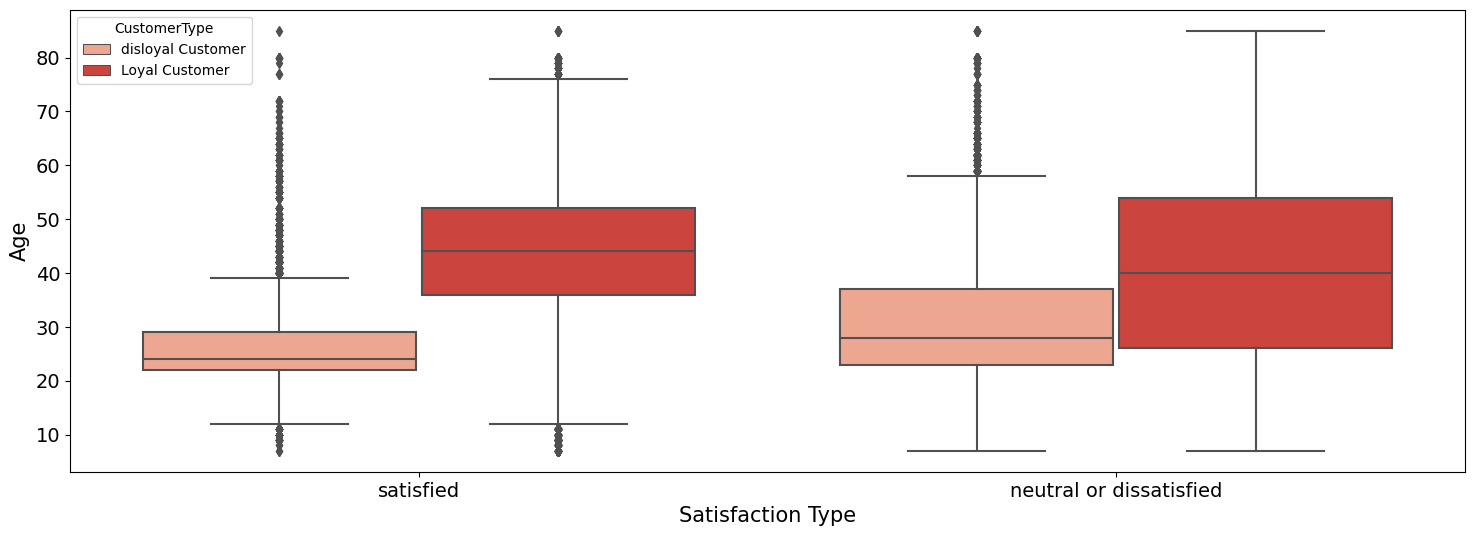

In [15]:
fig = plt.figure( figsize=(18,6))

sns.boxplot( y=df["Age"], x=df["SatisfactionType"], hue=df["CustomerType"], palette="Reds")
#sns.boxplot( y=df["Age"], x=df["SatisfactionType"], palette="Reds")

plt.xticks(fontsize=14)
plt.xlabel("Satisfaction Type", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Age", fontsize=15)

plt.show()

----------------

#### Check 03: Satisfaction by Travel Type

In [16]:
fName = "Type of Travel"
df_travel_type = getFeatureInteraction(df, fName)
#print(df_travel_type.drop(['Count_x','Count_y'], axis=1))

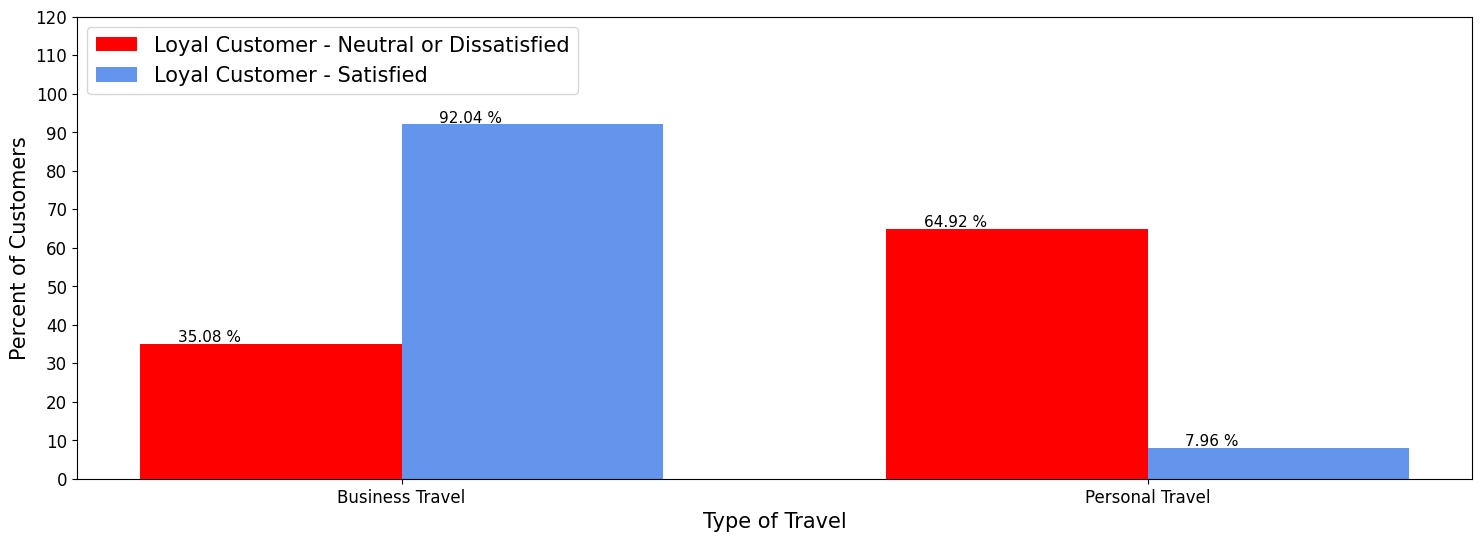

In [17]:
x = np.arange(2)        # the xlabel locations
y = np.arange(0,126,10) # the ylabel locations
y1 = df_travel_type[ (df_travel_type["CustomerType"]=="Loyal Customer") & (df_travel_type["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_travel_type[ (df_travel_type["CustomerType"]=="Loyal Customer") & (df_travel_type["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["Business Travel","Personal Travel"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Type of Travel")

In [18]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Type of Travel : 0.1101


--------

#### Check 04: Satisfaction by Travel Class

In [19]:
fName = "Class"
df_class = getFeatureInteraction(df, fName)
# print(df_class.drop(['Count_x','Count_y'], axis=1))

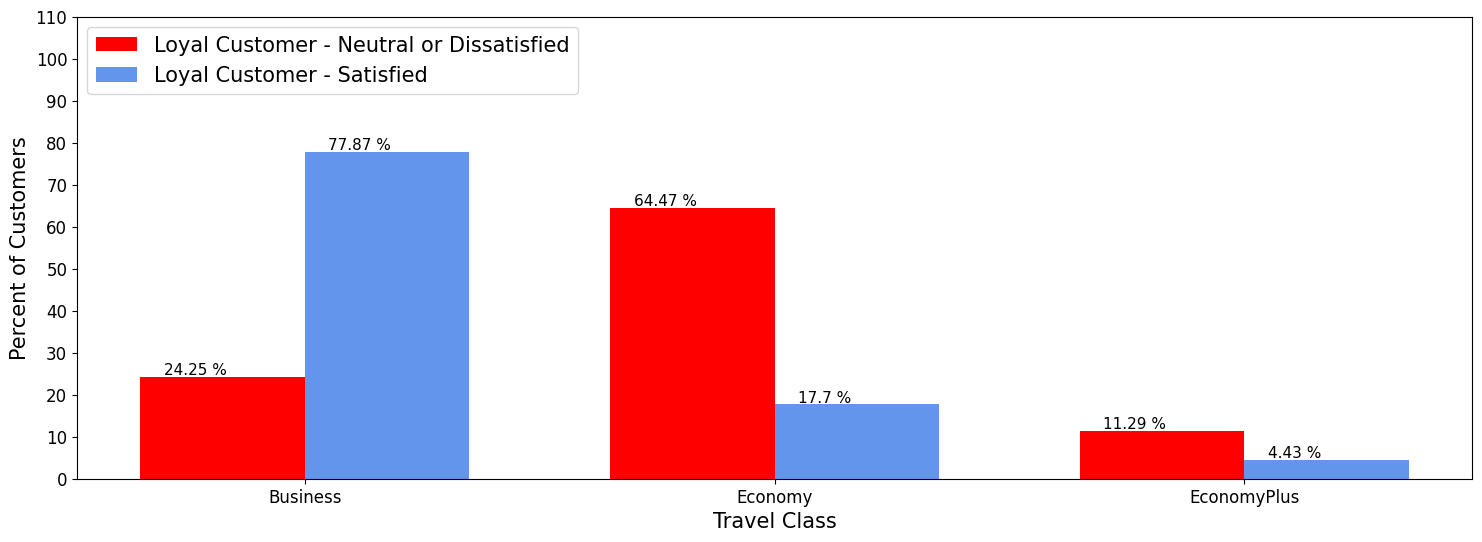

In [20]:
x = np.arange(3)        # the xlabel locations
y = np.arange(0,111,10) # the ylabel locations
y1 = df_class[ (df_class["CustomerType"]=="Loyal Customer") & (df_class["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_class[ (df_class["CustomerType"]=="Loyal Customer") & (df_class["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["Business","Economy","EconomyPlus"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Travel Class")

In [21]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Class : 0.1973


-----------

#### Check 05: Satisfaction by Flight Distance

In [22]:
df_flight_dist = df.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Flight Distance': ['median']} ).reset_index()
print(df_flight_dist)

        CustomerType         SatisfactionType Flight Distance
                                                       median
0     Loyal Customer  neutral or dissatisfied           700.0
1     Loyal Customer                satisfied          1521.0
2  disloyal Customer  neutral or dissatisfied           591.0
3  disloyal Customer                satisfied           622.0


In [23]:
"""Replace unknown distance by the median value"""
distList = sorted( df["Flight Distance"].unique() )
distList = distList[:-4:-1]
tmpdf = df[ df["Flight Distance"] <= distList[1] ]
#print( tmpdf["Flight Distance"].median() )
#print( tmpdf["Flight Distance"].mean() )
tmpdf.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Flight Distance': ['mean','std']} ).reset_index()

CustomerType         SatisfactionType Flight Distance             
                                                         mean          std
0     Loyal Customer  neutral or dissatisfied     1001.231128   851.766078
1     Loyal Customer                satisfied     1619.942773  1143.951308
2  disloyal Customer  neutral or dissatisfied      710.693623   508.356699
3  disloyal Customer                satisfied      724.978772   469.941239

--------------

#### Check 06: Inflight Wifi Service

In [24]:
fName = "Inflight wifi service"
df_wifi = getFeatureInteraction(df, fName)
#print(df_wifi.drop(['Count_x','Count_y'], axis=1))

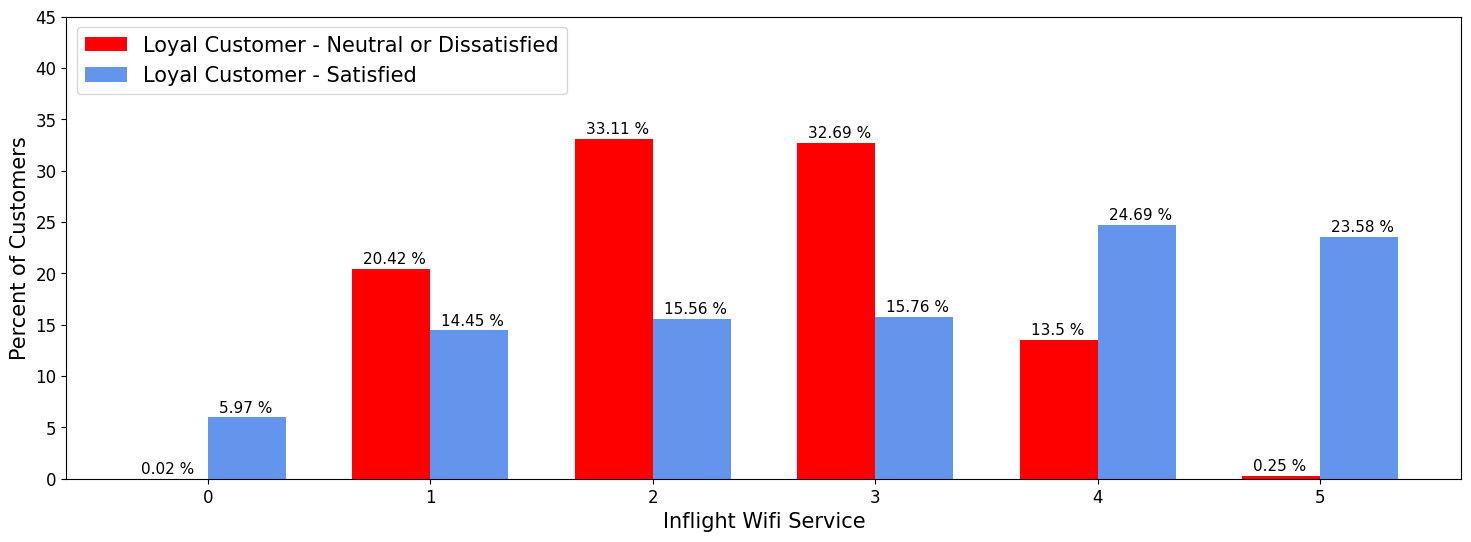

In [25]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_wifi[ (df_wifi["CustomerType"]=="Loyal Customer") & (df_wifi["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_wifi[ (df_wifi["CustomerType"]=="Loyal Customer") & (df_wifi["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Inflight Wifi Service")

In [26]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Inflight wifi service : 0.8082


-----------

#### Check 07: Departure/Arrival Time Convenient

In [27]:
fName = "Departure/Arrival time convenient"
df_time_conv = getFeatureInteraction(df, fName)
# print(df_time_conv.drop(['Count_x','Count_y'], axis=1))

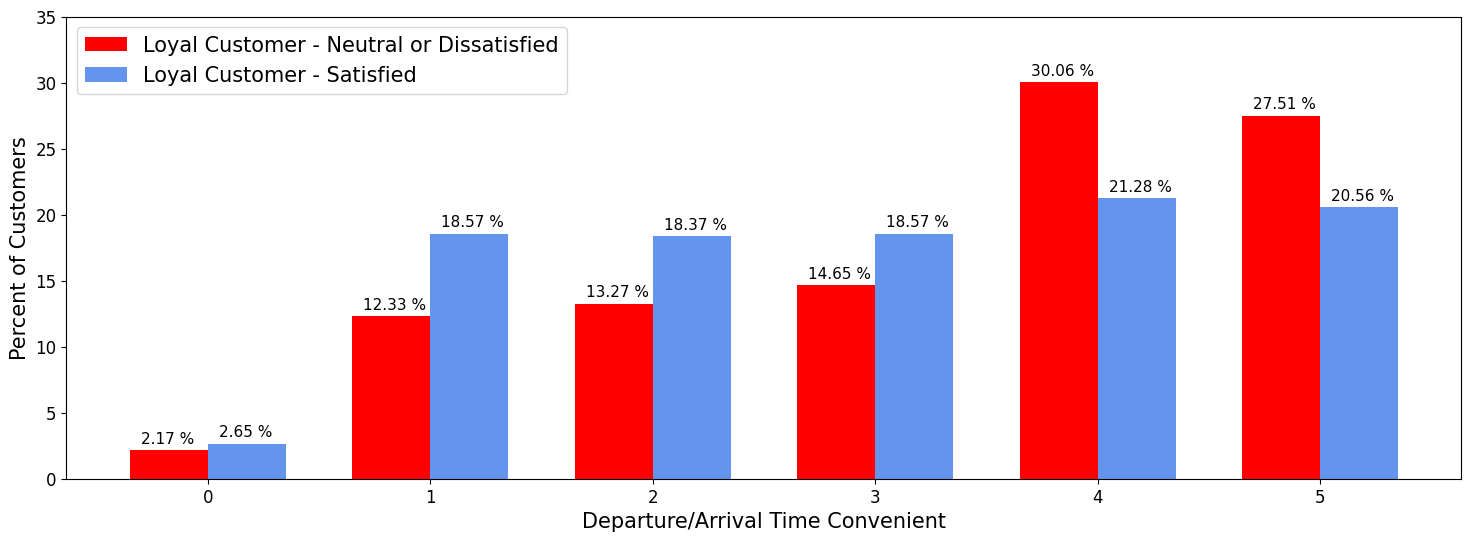

In [28]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_time_conv[ (df_time_conv["CustomerType"]=="Loyal Customer") & (df_time_conv["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_time_conv[ (df_time_conv["CustomerType"]=="Loyal Customer") & (df_time_conv["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Departure/Arrival Time Convenient")

In [29]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Departure/Arrival time convenient : 0.7955


-------------

#### Check 08: Ease of Online Booking

In [30]:
fName = "Ease of Online booking"
df_online_booking = getFeatureInteraction(df, fName)
# print(df_online.drop(['Count_x','Count_y'], axis=1))

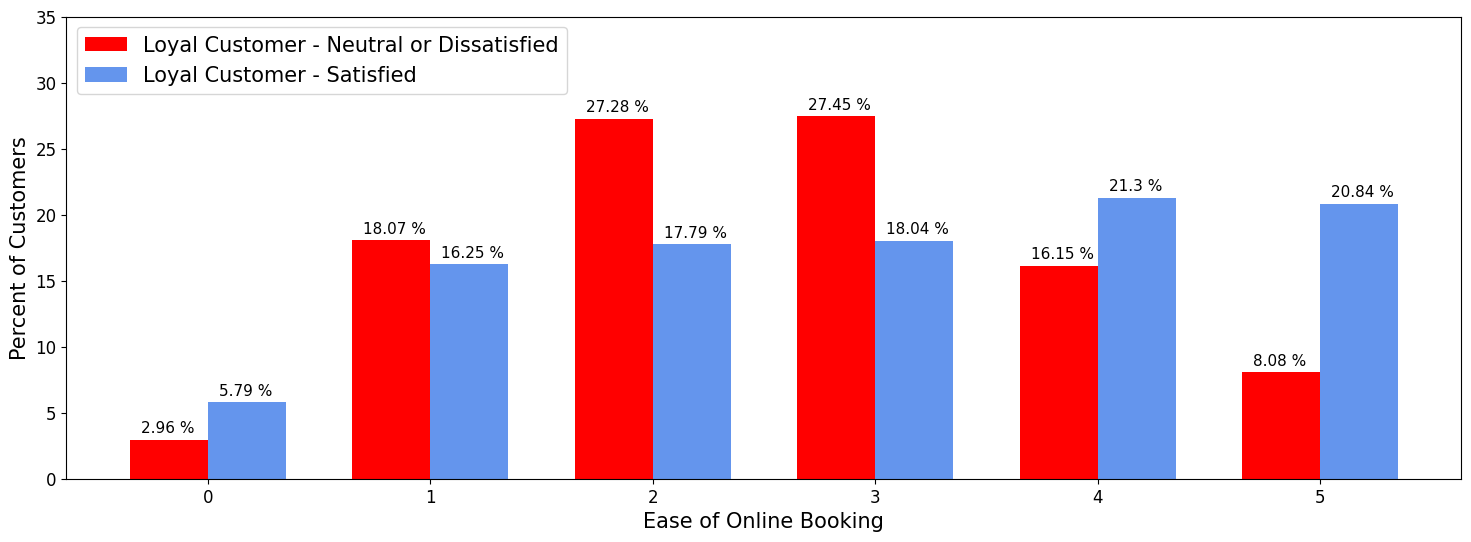

In [31]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_online_booking[ (df_online_booking["CustomerType"]=="Loyal Customer") & (df_online_booking["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_online_booking[ (df_online_booking["CustomerType"]=="Loyal Customer") & (df_online_booking["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Ease of Online Booking")

In [32]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Ease of Online booking : 0.793


--------------

#### Check 09: Gate Location

In [33]:
fName = "Gate location"
df_gateloc = getFeatureInteraction(df, fName)
#print(df_gateloc.drop(['Count_x','Count_y'], axis=1))

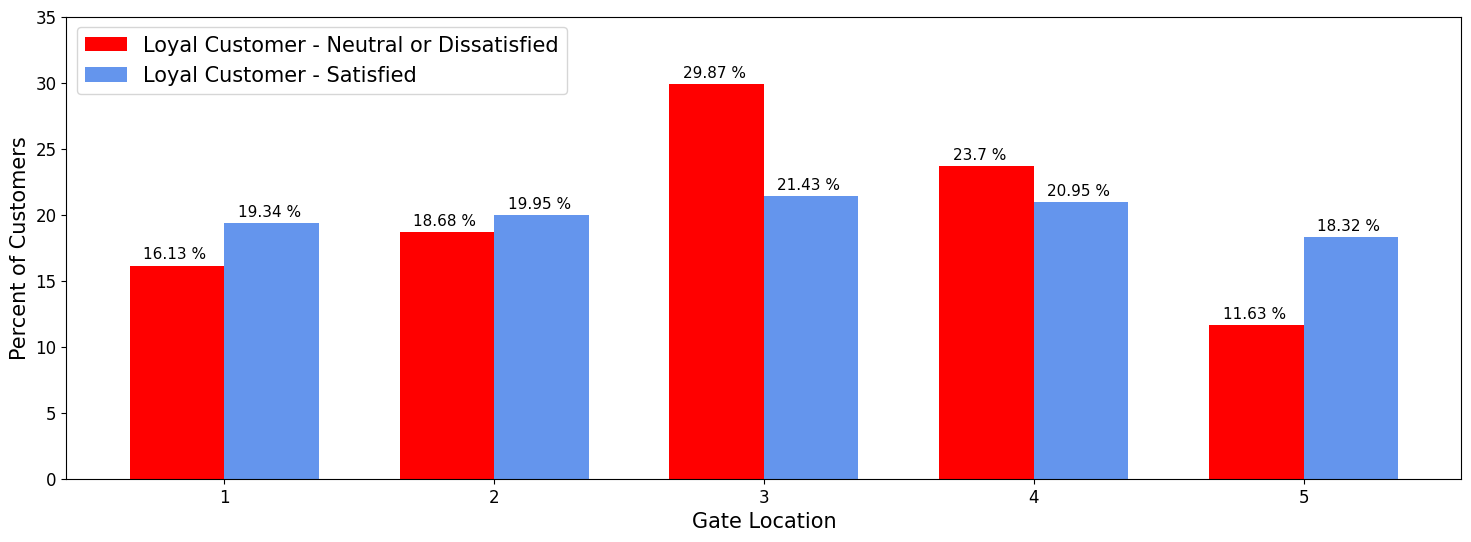

In [34]:
x = np.arange(5)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_gateloc[ (df_gateloc["CustomerType"]=="Loyal Customer") & (df_gateloc["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_gateloc[ (df_gateloc["CustomerType"]=="Loyal Customer") & (df_gateloc["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()[1:]
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Gate Location")

In [35]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Gate location : 0.8611


-----

#### Check 10: Food and Drink

In [36]:
fName = "Food and drink"
df_food = getFeatureInteraction(df, fName) 
#print(df_food.drop(['Count_x','Count_y'], axis=1))

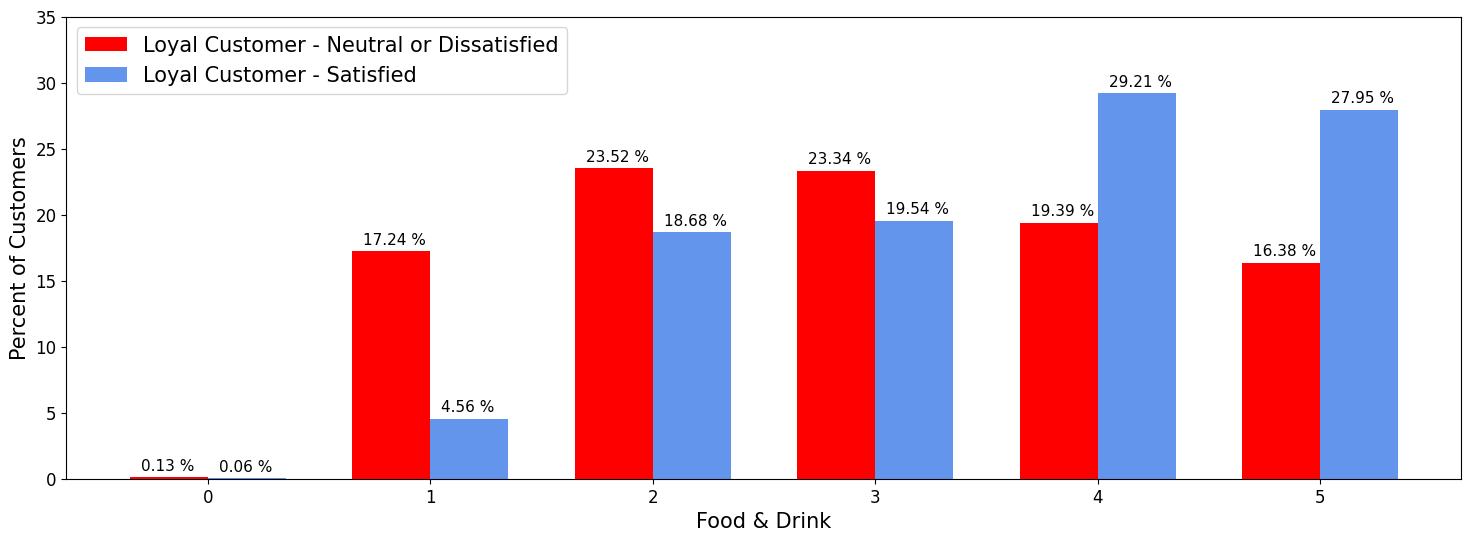

In [37]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_food[ (df_food["CustomerType"]=="Loyal Customer") & (df_food["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_food[ (df_food["CustomerType"]=="Loyal Customer") & (df_food["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Food & Drink")

In [38]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Food and drink : 0.8842


----------

#### Check 11: Online Boarding

In [39]:
fName = "Online boarding"
df_online_boarding = getFeatureInteraction(df, fName) 
#print(df_online_boarding.drop(['Count_x','Count_y'], axis=1))

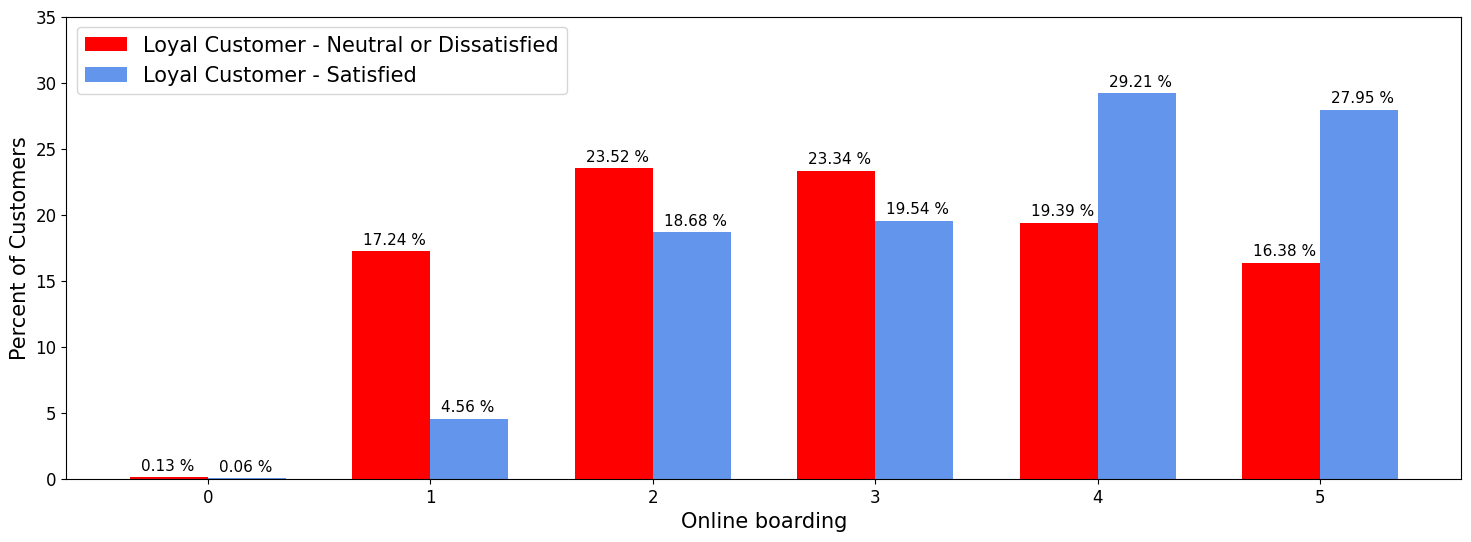

In [40]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_food[ (df_food["CustomerType"]=="Loyal Customer") & (df_food["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_food[ (df_food["CustomerType"]=="Loyal Customer") & (df_food["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, fName)

In [41]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Online boarding : 0.8601


---------

#### Check 12: Seat Comfort

In [42]:
fName = "Seat comfort"
df_seat_comf = getFeatureInteraction(df, fName) 
# print(df_seat_comf.drop(['Count_x','Count_y'], axis=1))

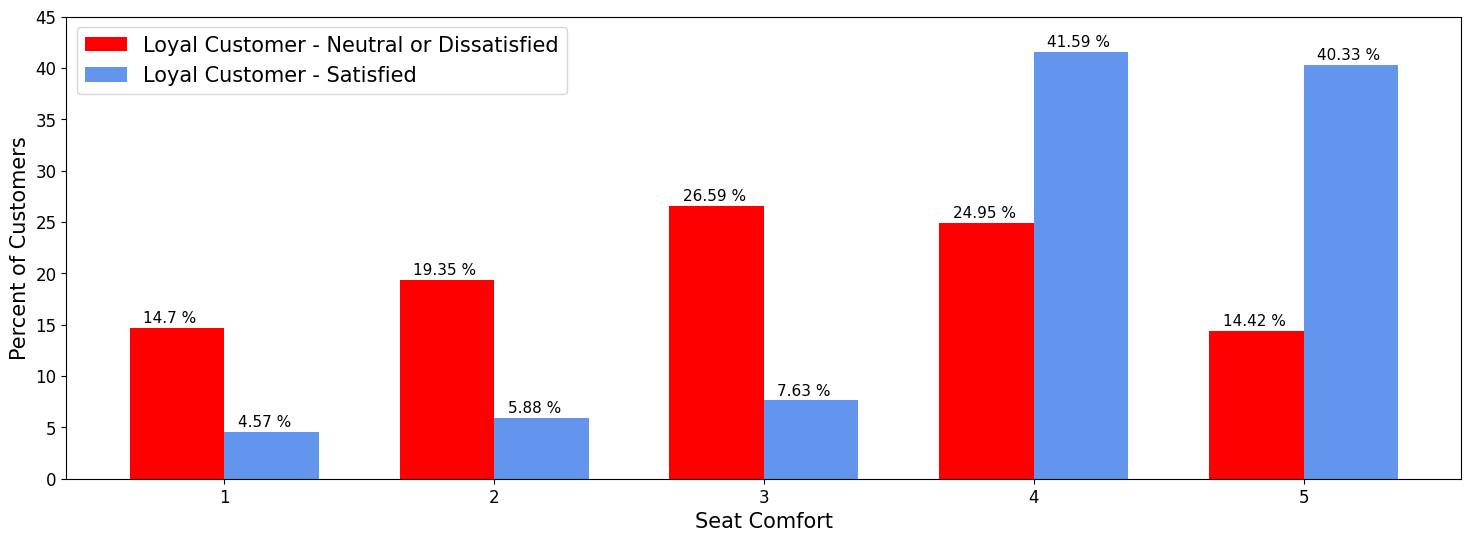

In [43]:
x = np.arange(5)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_seat_comf[ (df_seat_comf["CustomerType"]=="Loyal Customer") & (df_seat_comf["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_seat_comf[ (df_seat_comf["CustomerType"]=="Loyal Customer") & (df_seat_comf["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()[1:]
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Seat Comfort")

In [44]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Seat comfort : 0.8917


-----------

#### Check 13: Inflight Entertainment

In [45]:
fName = "Inflight entertainment"
df_inflight_enter = getFeatureInteraction(df, fName) 
#print(df_inflight_enter.drop(['Count_x','Count_y'], axis=1))

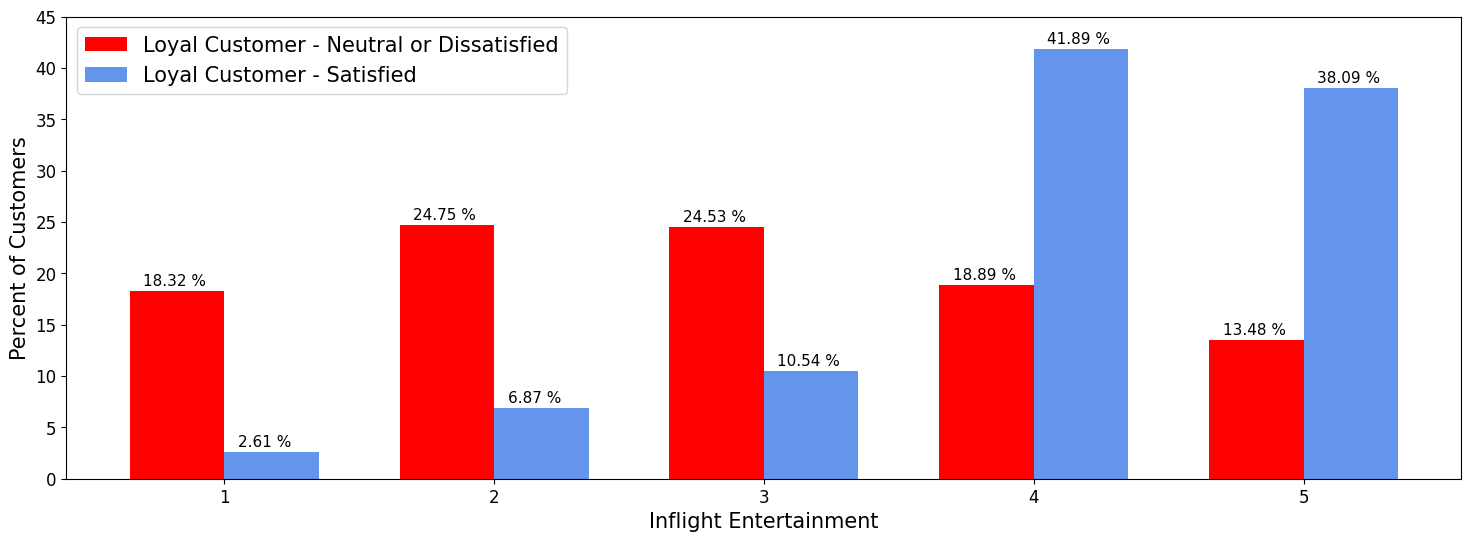

In [46]:
x = np.arange(5)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_inflight_enter[ (df_inflight_enter["CustomerType"]=="Loyal Customer") & (df_inflight_enter["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_inflight_enter[ (df_inflight_enter["CustomerType"]=="Loyal Customer") & (df_inflight_enter["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()[1:]
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Inflight Entertainment")

In [47]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Inflight entertainment : 0.8885


---------

#### Check 14: Leg Room Service

In [48]:
fName = "Leg room service"
df_leg_room = getFeatureInteraction(df, fName) 
# print(df_leg_room.drop(['Count_x','Count_y'], axis=1))

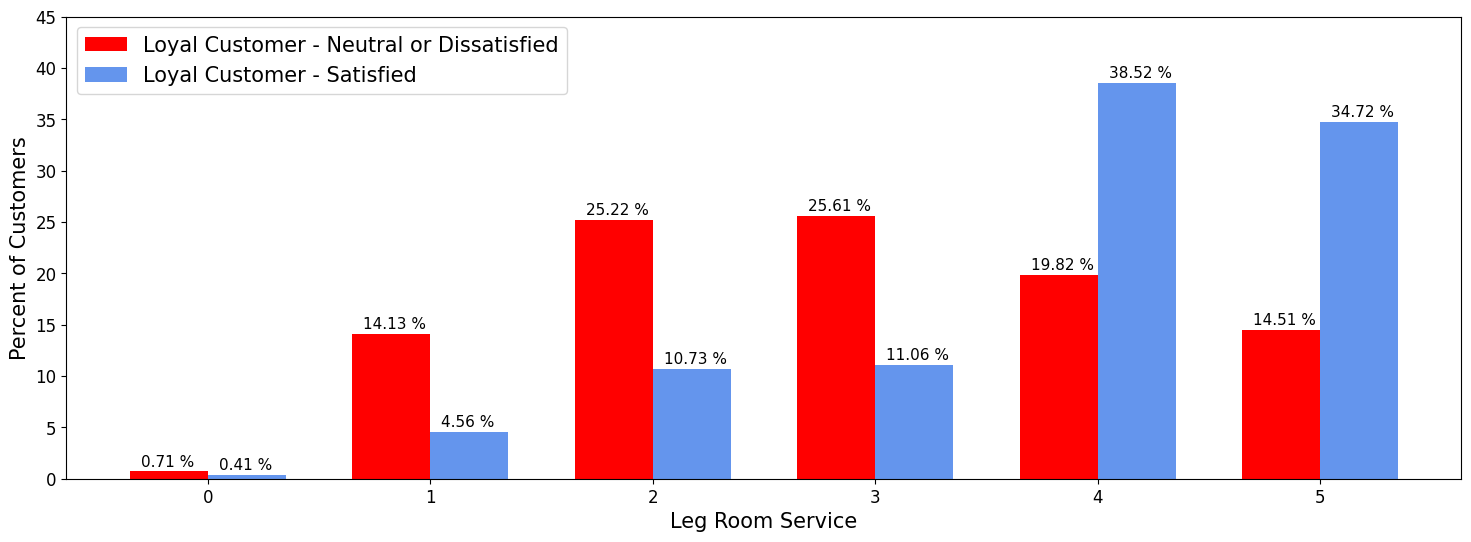

In [49]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_leg_room[ (df_leg_room["CustomerType"]=="Loyal Customer") & (df_leg_room["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_leg_room[ (df_leg_room["CustomerType"]=="Loyal Customer") & (df_leg_room["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Leg Room Service")

In [50]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Leg room service : 0.892


----------

#### Check 15: Baggage Handling

In [51]:
fName = "Baggage handling"
df_baggage = getFeatureInteraction(df, fName) 
# print(df_baggage.drop(['Count_x','Count_y'], axis=1))

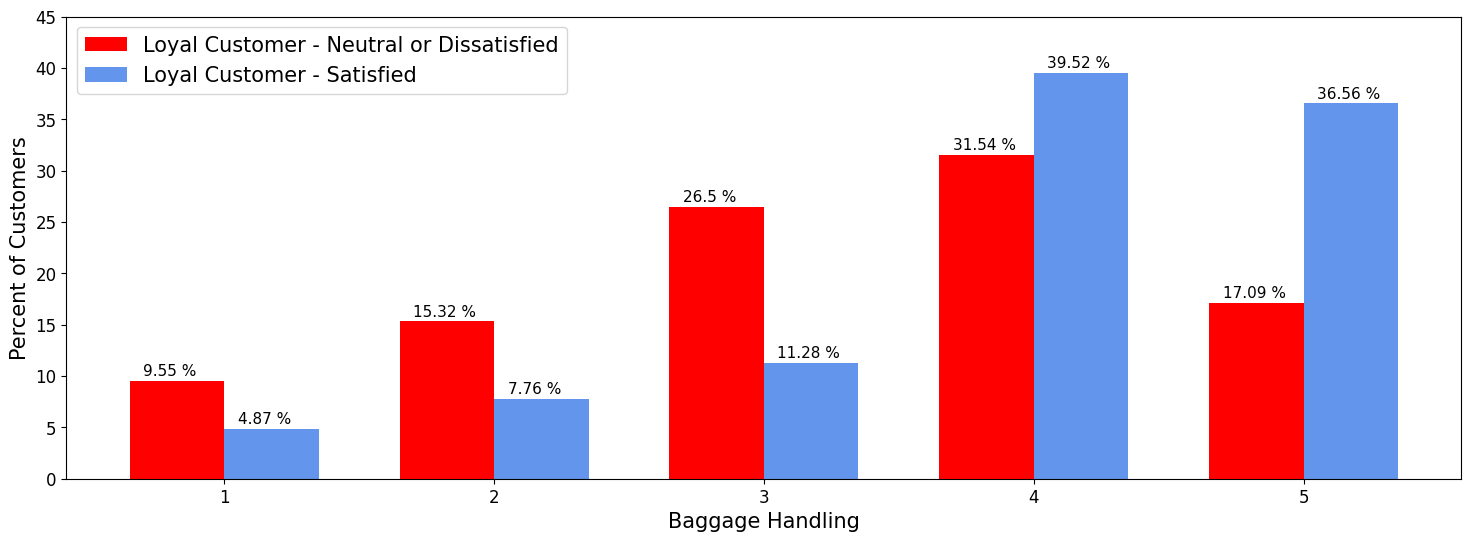

In [52]:
x = np.arange(5)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_baggage[ (df_baggage["CustomerType"]=="Loyal Customer") & (df_baggage["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_baggage[ (df_baggage["CustomerType"]=="Loyal Customer") & (df_baggage["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Baggage Handling")

In [53]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Baggage handling : 0.8021


-------------

#### Check 16: Checkin Service

In [54]:
fName = "Checkin service"
df_checkin = getFeatureInteraction(df, fName) 
# print(df_checkin.drop(['Count_x','Count_y'], axis=1))

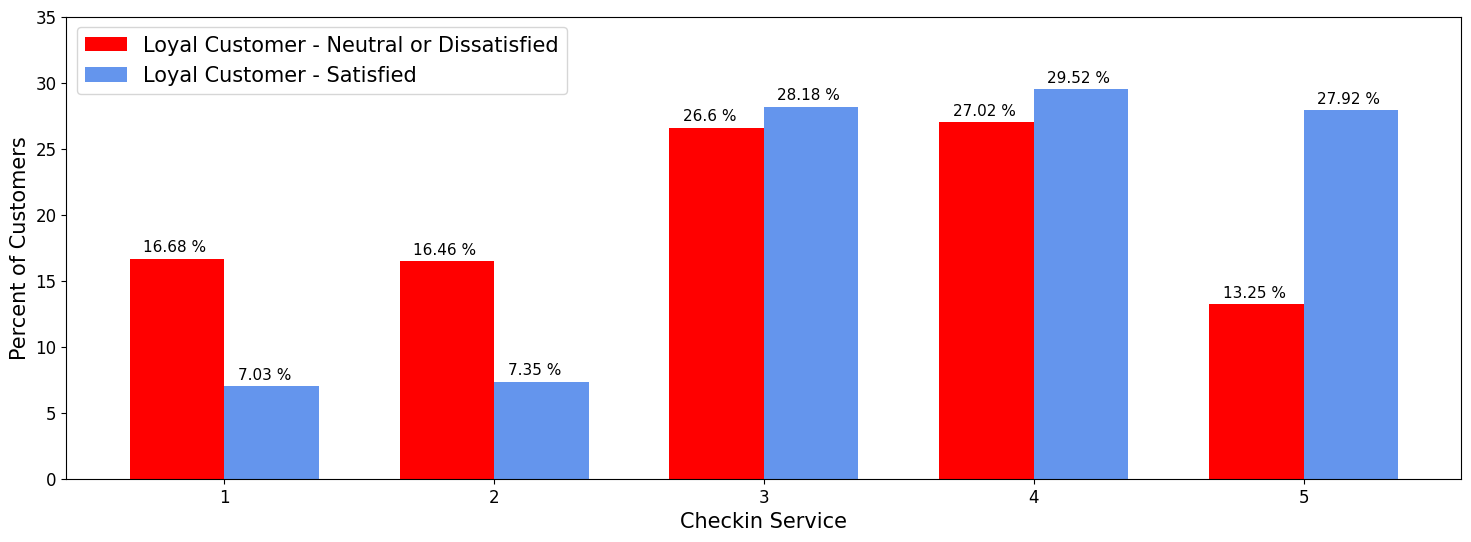

In [55]:
x = np.arange(5)      # the xlabel locations
y = np.arange(0,36,5) # the ylabel locations
y1 = df_checkin[ (df_checkin["CustomerType"]=="Loyal Customer") & (df_checkin["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_checkin[ (df_checkin["CustomerType"]=="Loyal Customer") & (df_checkin["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()[1:]
y2 = y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Checkin Service")

In [56]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Checkin service : 0.8869


-------------

#### Check 17: Inflight Service

In [57]:
fName = "Inflight service"
df_inflight_service = getFeatureInteraction(df, fName) 
# print(df_inflight_service.drop(['Count_x','Count_y'], axis=1))

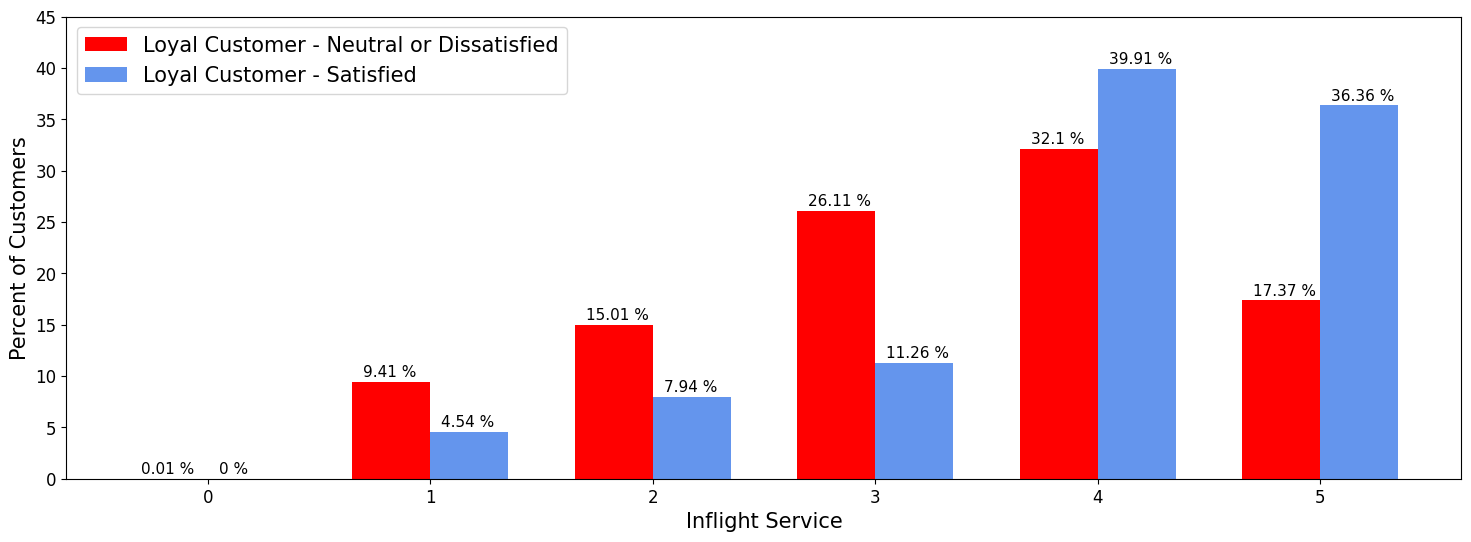

In [58]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,46,5) # the ylabel locations
y1 = df_inflight_service[ (df_inflight_service["CustomerType"]=="Loyal Customer") & (df_inflight_service["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_inflight_service[ (df_inflight_service["CustomerType"]=="Loyal Customer") & (df_inflight_service["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = [0] + y2['Fraction'].to_list()
h  = [y1,y2]
xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Inflight Service")

In [59]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Inflight service : 0.925


-------------

#### Check 18: Cleanliness

In [60]:
fName = "Cleanliness"
df_clean = getFeatureInteraction(df, fName) 
#print(df_clean.drop(['Count_x','Count_y'], axis=1))

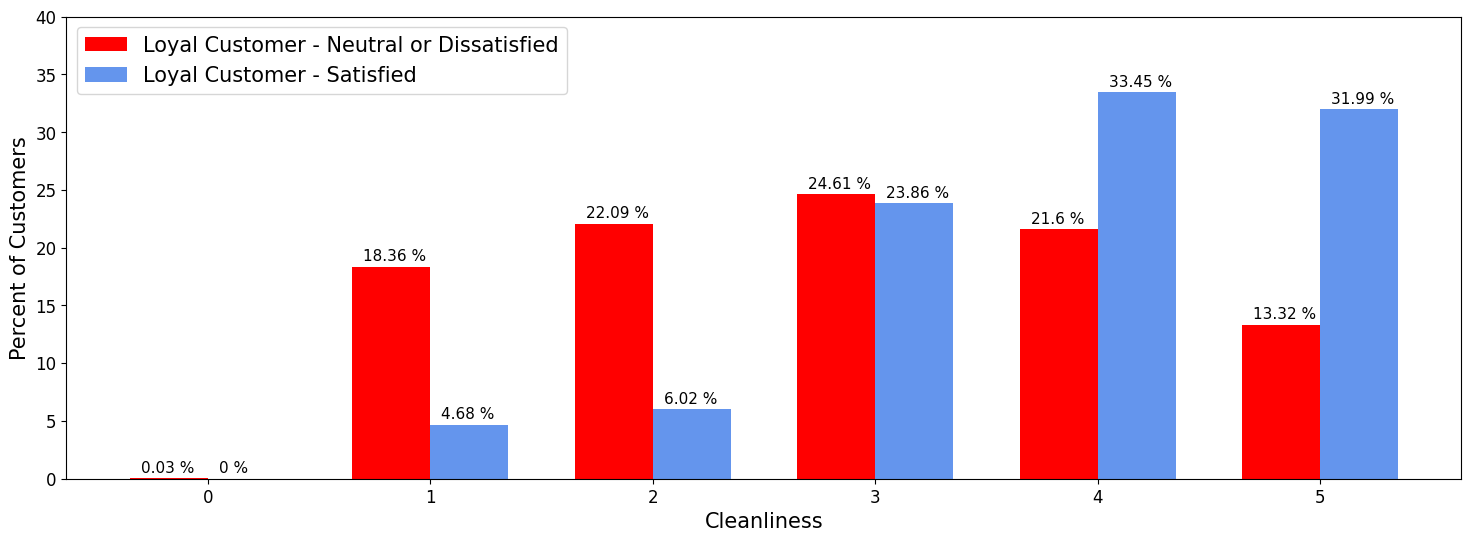

In [61]:
x = np.arange(6)      # the xlabel locations
y = np.arange(0,41,5) # the ylabel locations

y1 = df_clean[ (df_clean["CustomerType"]=="Loyal Customer") & (df_clean["SatisfactionType"]=="neutral or dissatisfied") ] 
y2 = df_clean[ (df_clean["CustomerType"]=="Loyal Customer") & (df_clean["SatisfactionType"]=="satisfied") ] 
y1 = y1['Fraction'].to_list()
y2 = [0] + y2['Fraction'].to_list()
h = [y1,y2]

xtick_label = ["0","1","2","3","4","5"]
ytick_label = y

plotFeatureInteraction(x, y, h, xtick_label, ytick_label, "Cleanliness")

In [62]:
js_distance = getJSDistance(df, fName)
print(f"Distribution Similarity between Satisfaction & {fName} : {round(js_distance,4)}")

Distribution Similarity between Satisfaction & Cleanliness : 0.8836


------------

#### Check 19: Delay in Arrival

In [63]:
df.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Arrival Delay in Minutes': ['mean', 'std']} ).reset_index()

CustomerType         SatisfactionType Arrival Delay in Minutes  \
                                                                  mean   
0     Loyal Customer  neutral or dissatisfied                17.281436   
1     Loyal Customer                satisfied                12.520327   
2  disloyal Customer  neutral or dissatisfied                16.365639   
3  disloyal Customer                satisfied                12.654184   

              
         std  
0  41.068331  
1  35.438232  
2  38.794267  
3  35.552438

In [64]:
df.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Arrival Delay in Minutes': ['median']} ).reset_index()

,CustomerType,SatisfactionType,Arrival Delay in Minutes
,,,median
0,Loyal Customer,neutral or dissatisfied,0.0
1,Loyal Customer,satisfied,0.0
2,disloyal Customer,neutral or dissatisfied,0.0
3,disloyal Customer,satisfied,0.0


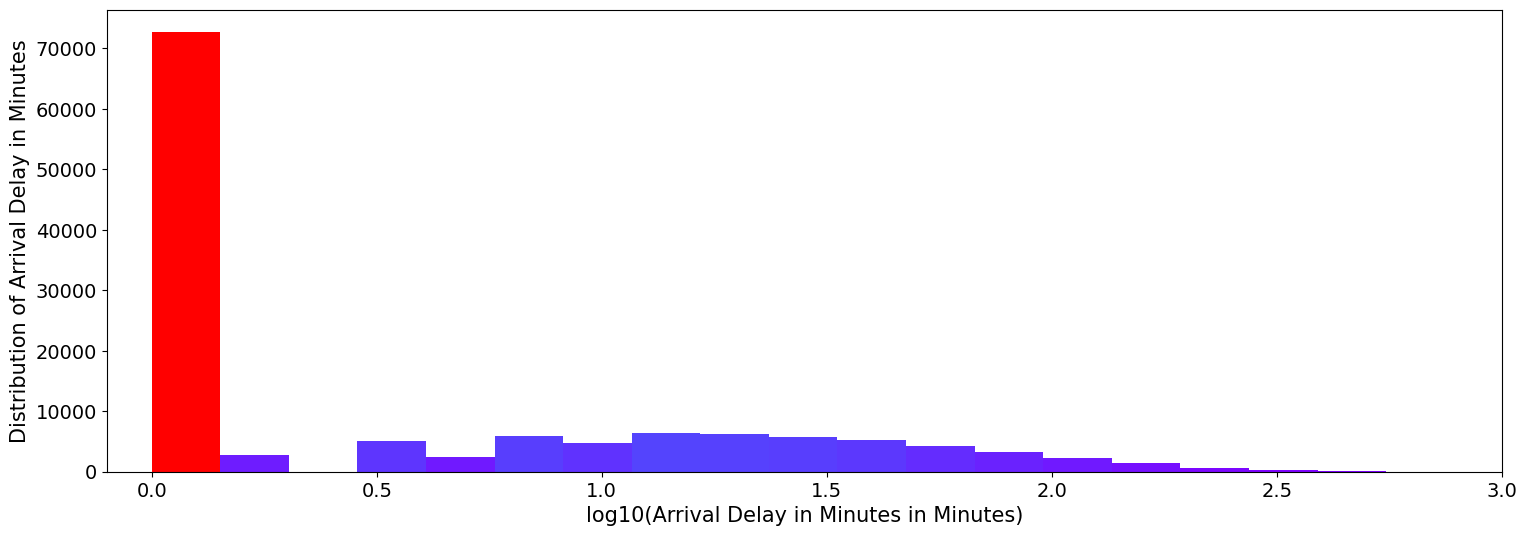

In [65]:
fig = plt.figure( figsize=(18,6))

n, bins, patches = plt.hist( np.log10(1+df['Arrival Delay in Minutes']), bins=21)

# Color code by height
fracs = n / n.max()

# Normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Loop through the objects and set the color of each accordingly
for _frac, _patch in zip(fracs, patches):
    color = plt.cm.rainbow( norm(_frac) )
    _patch.set_facecolor(color)
    
plt.xticks(fontsize=14)
plt.xlim(xmin=-0.1, xmax=3)
plt.xlabel("log10(Arrival Delay in Minutes in Minutes)", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Distribution of Arrival Delay in Minutes", fontsize=15)

plt.show()

--------

#### Check 20: Delay in Departure

In [66]:
df.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Departure Delay in Minutes': ['mean','std']} ).reset_index()

CustomerType         SatisfactionType Departure Delay in Minutes  \
                                                                    mean   
0     Loyal Customer  neutral or dissatisfied                  16.621722   
1     Loyal Customer                satisfied                  12.485550   
2  disloyal Customer  neutral or dissatisfied                  15.748728   
3  disloyal Customer                satisfied                  12.725439   

              
         std  
0  40.836516  
1  34.973240  
2  38.105071  
3  35.342540

In [67]:
df.groupby(["CustomerType", "SatisfactionType"]).agg({ 'Departure Delay in Minutes': ['median']} ).reset_index()

,CustomerType,SatisfactionType,Departure Delay in Minutes
,,,median
0,Loyal Customer,neutral or dissatisfied,0.0
1,Loyal Customer,satisfied,0.0
2,disloyal Customer,neutral or dissatisfied,0.0
3,disloyal Customer,satisfied,0.0


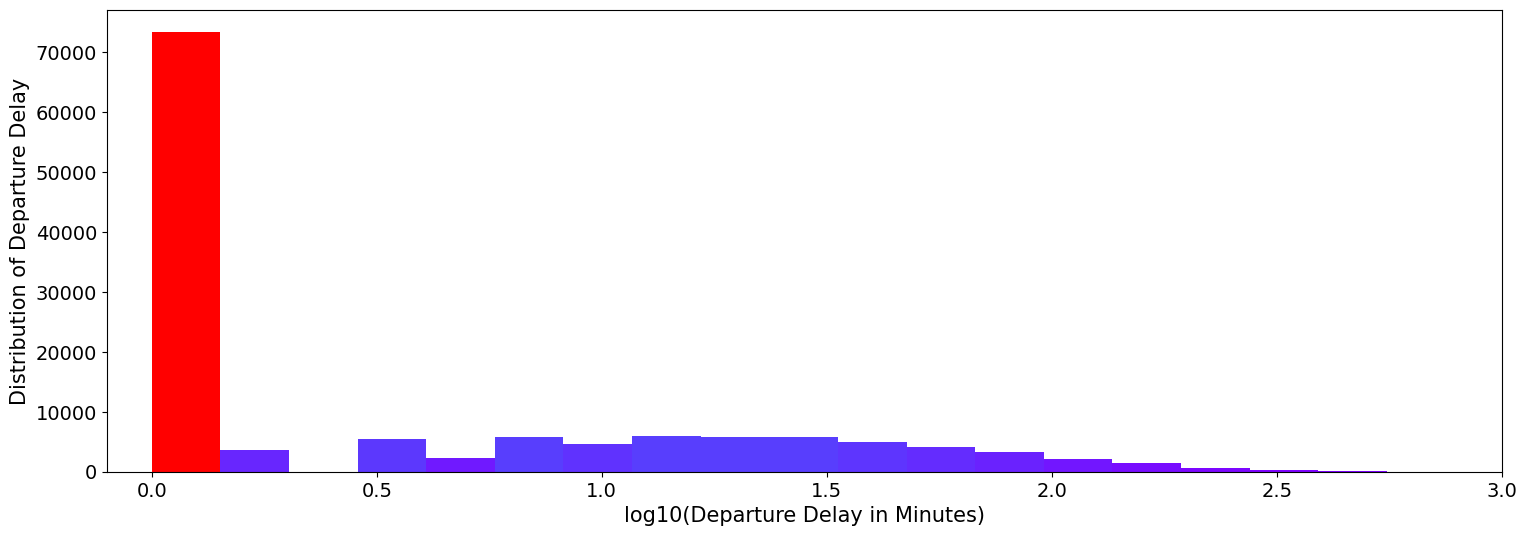

In [68]:
fig = plt.figure( figsize=(18,6))

n, bins, patches = plt.hist( np.log10(1+df['Departure Delay in Minutes']), bins=21)

# Color code by height
fracs = n / n.max()

# Normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize( fracs.min(), fracs.max() )

# Loop through the objects and set the color of each accordingly
for _frac, _patch in zip(fracs, patches):
    color = plt.cm.rainbow(norm(_frac))
    _patch.set_facecolor(color)
    
plt.xticks(fontsize=14)
plt.xlim(xmin=-0.1, xmax=3)
plt.xlabel("log10(Departure Delay in Minutes)", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Distribution of Departure Delay", fontsize=15)

plt.show()

#### Relationship between Arrival Delay in Minutes & Departure Delay in Minutes

Strongly Correlated  

In [69]:
df_arr_dep = df[['Arrival Delay in Minutes','Departure Delay in Minutes']]
df_arr_dep.corr()

,Arrival Delay in Minutes,Departure Delay in Minutes
Arrival Delay in Minutes,1.000000,0.965291
Departure Delay in Minutes,0.965291,1.000000


----------

## Part 5: Explore Class Decision Boundary 

It is eeasier to explore Class Boundary using numerical features.

This 2D plot helps to visualize the complexity of the decision boundary. It also provides qualitative assesment 
of the strengths of the features in sepearting the classes.

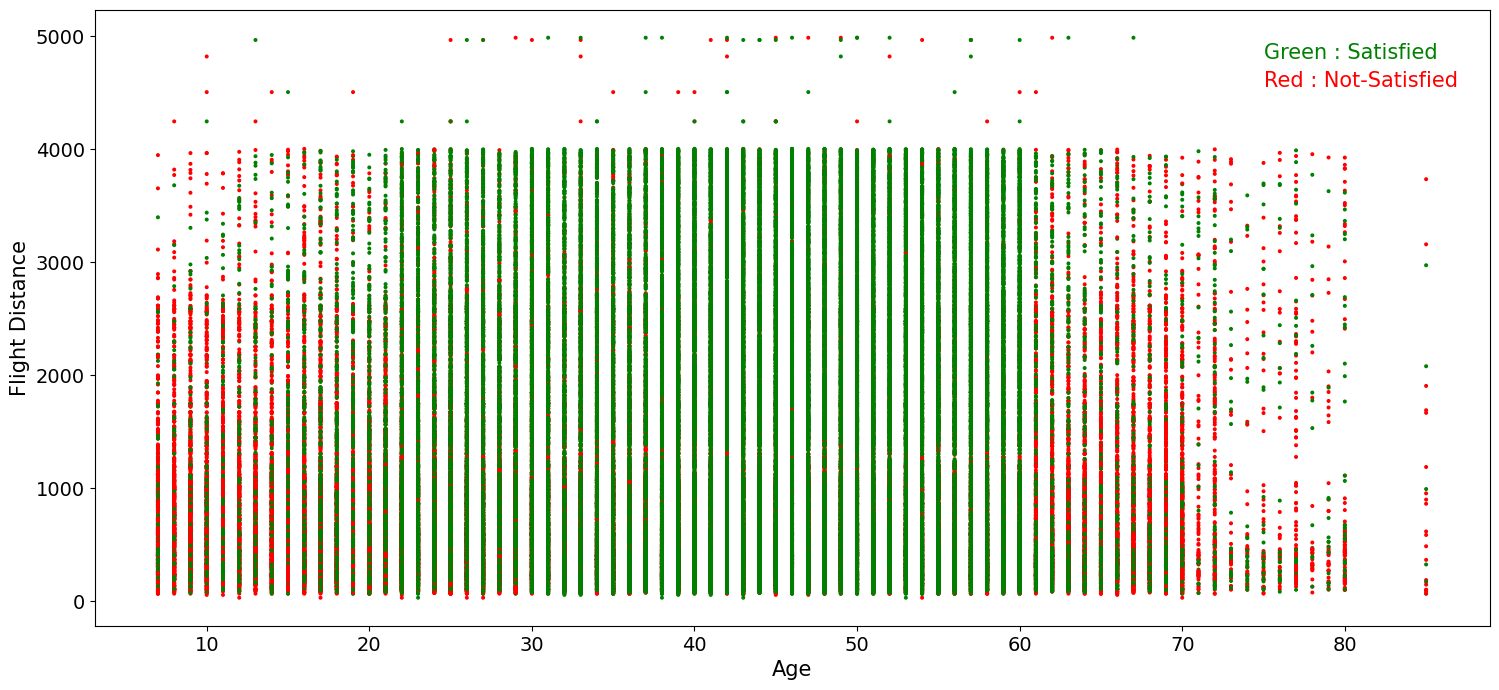

In [70]:
"""
    Case 1: Age vs Flight Distance 
    Flight Distance has some bad data (about 14 out of 129,800). Remove those for this exercise
"""
plt.figure( figsize=(18,8))
distList = sorted( df["Flight Distance"].unique() )
distList = distList[:-4:-1]
tmpdf = df[ df["Flight Distance"] <= distList[1] ]
#print( tmpdf["Flight Distance"].median() )
#print( tmpdf["Flight Distance"].mean() )
#tmpdf.groupby(["", "SatisfactionType"]).agg({ 'Flight Distance': ['mean','std']} ).reset_index()

color= ['green' if l == "satisfied" else 'red' for l in tmpdf['SatisfactionType']]
plt.scatter(tmpdf['Age'], tmpdf['Flight Distance'], s=[3.5,], color=color)

plt.xticks(fontsize=14)
plt.xlabel("Age", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Flight Distance", fontsize=15)

plt.text(75, 4800, 'Green : Satisfied', color='g', fontsize=15)
plt.text(75, 4550, 'Red : Not-Satisfied', color='r', fontsize=15)

plt.show()

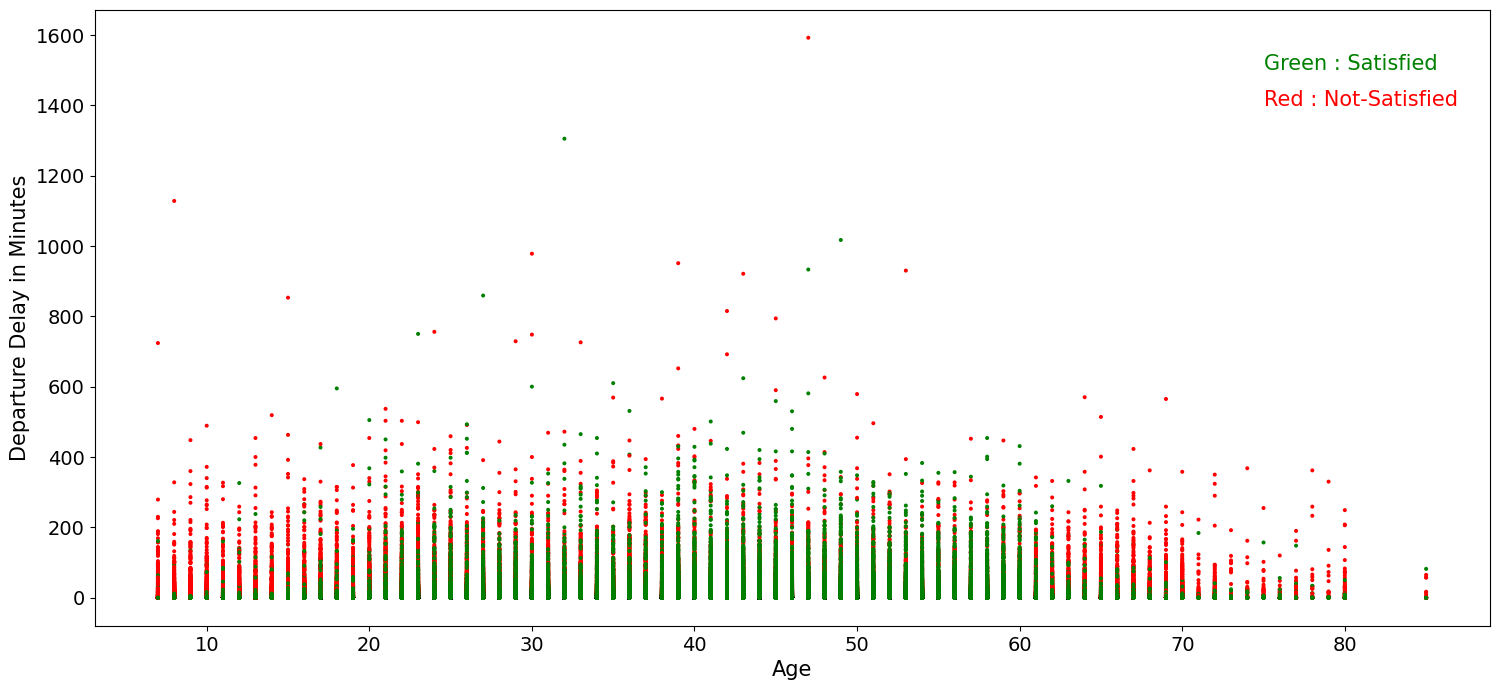

In [71]:
"""
    Case 2: Age vs Departure Delay in Minutes 
"""
plt.figure( figsize=(18,8))

color= ['green' if l == "satisfied" else 'red' for l in df['SatisfactionType']]
plt.scatter(df['Age'], df['Departure Delay in Minutes'], s=[3.5,], color=color)

plt.xticks(fontsize=14)
plt.xlabel("Age", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Departure Delay in Minutes", fontsize=15)

plt.text(75, 1500, 'Green : Satisfied', color='g', fontsize=15)
plt.text(75, 1400, 'Red : Not-Satisfied', color='r', fontsize=15)

plt.show()

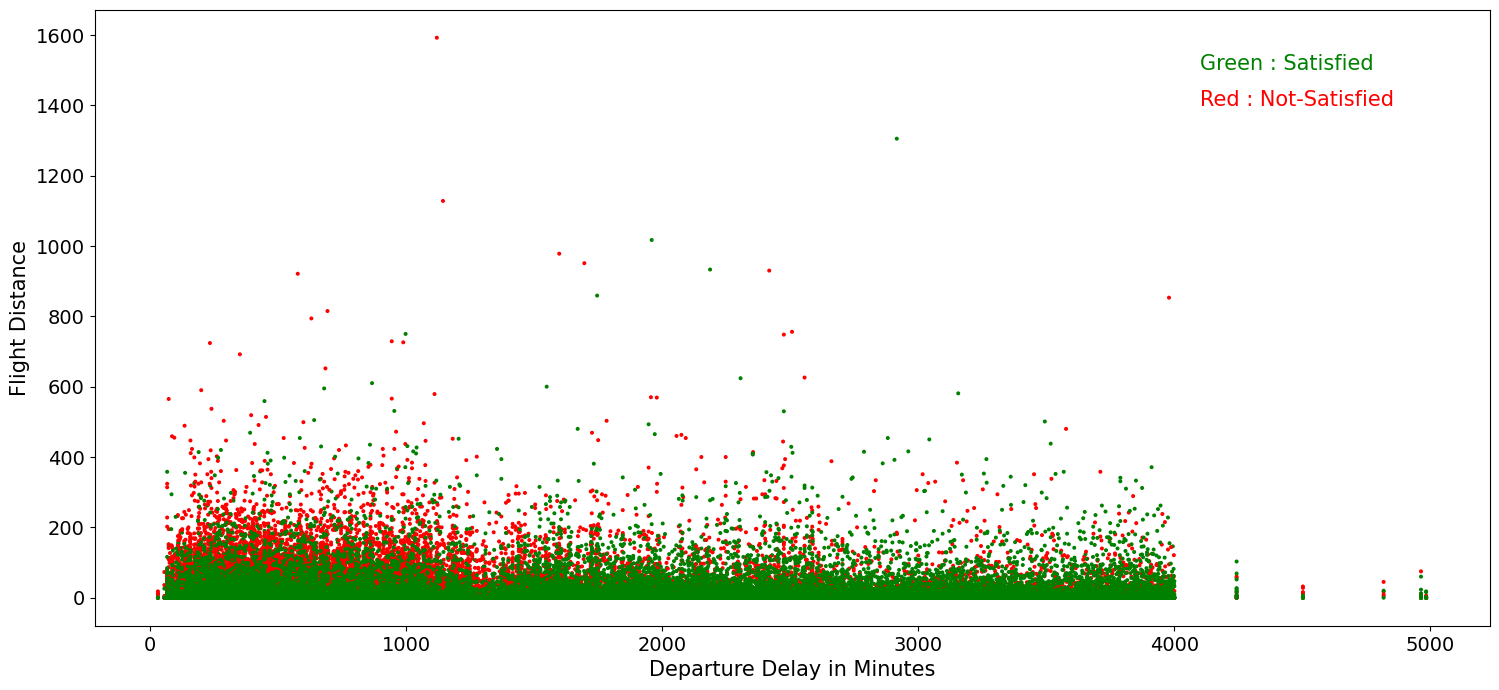

In [72]:
"""
    Case 3: Flight Distance vs Departure Delay in Minutes
    Flight Distance has some bad data (about 14 out of 129,800). Remove those for this exercise
"""
plt.figure( figsize=(18,8))
distList = sorted( df["Flight Distance"].unique() )
distList = distList[:-4:-1]
tmpdf = df[ df["Flight Distance"] <= distList[1] ]

color= ['green' if l == "satisfied" else 'red' for l in tmpdf['SatisfactionType']]
plt.scatter( tmpdf['Flight Distance'], tmpdf['Departure Delay in Minutes'], s=[3.5,], color=color)

plt.xticks(fontsize=14)
plt.xlabel("Departure Delay in Minutes", fontsize=15)

plt.yticks(fontsize=14)
plt.ylabel("Flight Distance", fontsize=15)

plt.text(4100, 1500, 'Green : Satisfied', color='g', fontsize=15)
plt.text(4100, 1400, 'Red : Not-Satisfied', color='r', fontsize=15)

plt.show()

-------

## Part 6: Insight/Conclusion

Out of all customers of the company, according to the data ~82% of are loyal. Therefore, one should identify 
the possible reasons behind the unhappiness of those loyals customers. Once the reasons of dissatisfaction 
are identified then one can take the necessary steps to address those issues.

Among loyal customers the data suggests almost ~50% split (39% vs 43%) with regards to satisfaction and dissatisfaction. Therefore, the current satisfaction level of customers is a BIG ISSUE for the company. 

We have performed Relative Entropy, i.e. JenssenShannon Distribution Similarity measure (look-alike) between Loyal-Satisfied vs Loyal-Dissatisfied customers across various data dimensions. Our analysis suggests various travel characteristics impact satisfaction level of loyal customers at various degrees. Below we provide top 
ten features where the satisfaction levels varies significantly between those groups: 

Inflight Service : 0.925

Leg Room Service : 0.892

Seat Comfort : 0.8917

Inflight Entertainment : 0.8885
    
Checkin Service : 0.8869

Food and Drink : 0.8842

Cleanliness : 0.8836

Gate Location : 0.8611

Online Boarding : 0.8601

Inflight Wifi Service : 0.8082


#### Outliers in Numerical Features:

Flight Distance has extreme outliers (> 5 sigma). Both Departure Delay in Minutes as well as Arrival Delay in Minutes have outliers with 3-5 sigma of the sample mean.